In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt   # možná bude potřeba doinstalovat v novém prostředí!!!
from tensorflow.keras import layers, models
import random


ModuleNotFoundError: No module named 'tensorflow'

In [30]:
# dataset mnist - handwritten numbers
mnist_dataset = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_dataset.load_data()


In [31]:
# normalizace dat
train_images = train_images / 255
test_images = test_images / 255

# jména tříd = čísla
class_names = [str(i) for i in range(10)]

In [33]:
def show_sample(sample, clas):
    plt.figure()
    plt.imshow(sample, cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.title(clas)
    plt.show()    

In [34]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [35]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.fit(train_images, train_labels, epochs=3)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9963 - loss: 0.0116
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9966 - loss: 0.0104
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9975 - loss: 0.0080


In [36]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


313/313 - 1s - 3ms/step - accuracy: 0.0755 - loss: 2.3055


In [37]:
predictions = pr_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step


In [38]:
# zobrazí predikci vzorku číslo i
def sample_predict(i, test_images, test_labels, predictions, class_names):
    s = test_images[i]
    c = class_names[test_labels[i]]
    show_sample(s, c)
    
    print("Probabilities")
    print("------------")
    for j in range(len(class_names)):
        print(class_names[j], ":", np.round(predictions[i, j], 2))
    
    ind = np.argmax(predictions[i])
    
    print("------------")
    print("true class:", c, ", predicted class:", class_names[ind])

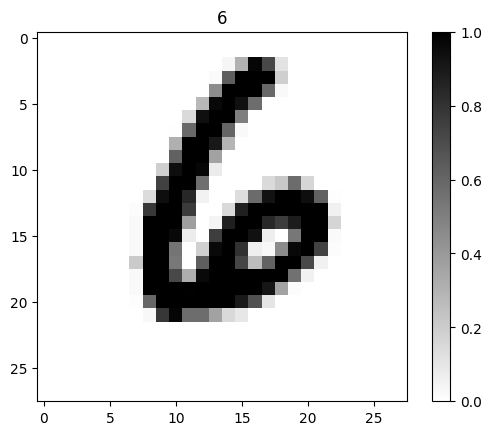

Probabilities
------------
0 : 0.0
1 : 0.0
2 : 0.0
3 : 0.0
4 : 0.0
5 : 0.0
6 : 1.0
7 : 0.0
8 : 0.0
9 : 0.0
------------
true class: 6 , predicted class: 6


In [50]:
sample_predict(random.randint(0, len(test_images)), test_images, test_labels, predictions, class_names)